In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('spam_ham_dataset.csv')
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
df = df.where((pd.notnull(df)),'')

In [4]:
df['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [5]:
# adding new column as length of the text
df['length'] = df['text'].apply(len)
df.head()

,Unnamed: 0,label,text,label_num,length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


#### EDA

Text(0.5, 1.0, 'Number of Spam and Not spam')

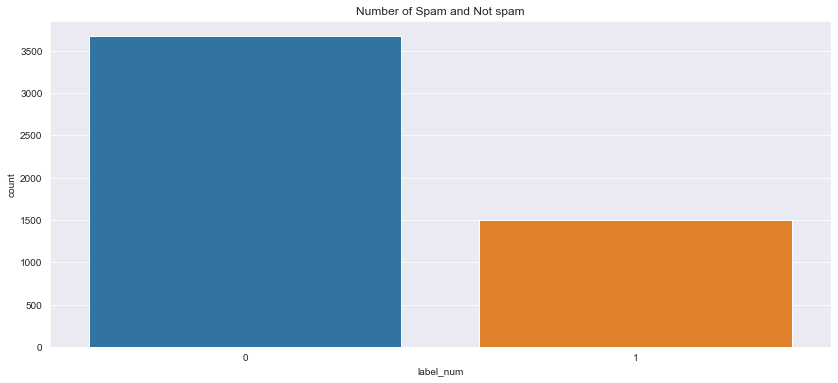

In [6]:
# plot for count of spam and ham in data
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.countplot(x='label_num',data=df)
plt.title('Number of Spam and Not spam')

Text(0.5, 1.0, 'Length of Text')

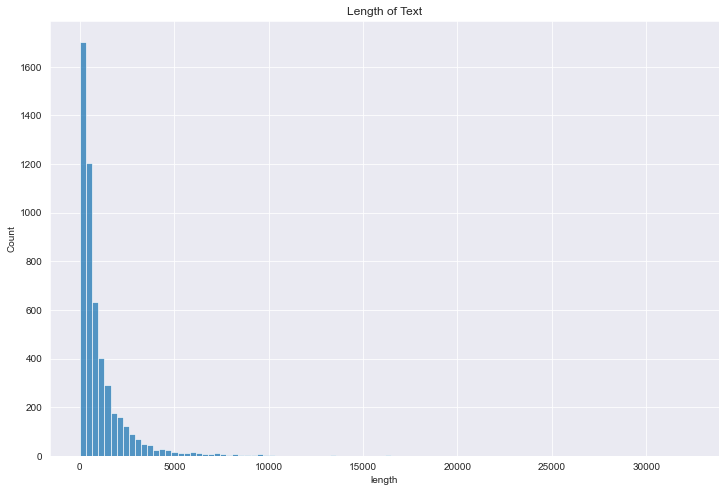

In [7]:
# Plot for distribution lenth of text
plt.figure(figsize=(12,8))
sns.histplot(x='length',data=df,bins=100)
plt.title('Length of Text')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
 4   length      5171 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 202.1+ KB


In [9]:
# maximum lenth text 
df[df['length']==df['length'].max()]['text']

949    Subject: fw : " red , white and blue out "\r\n...
Name: text, dtype: object

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

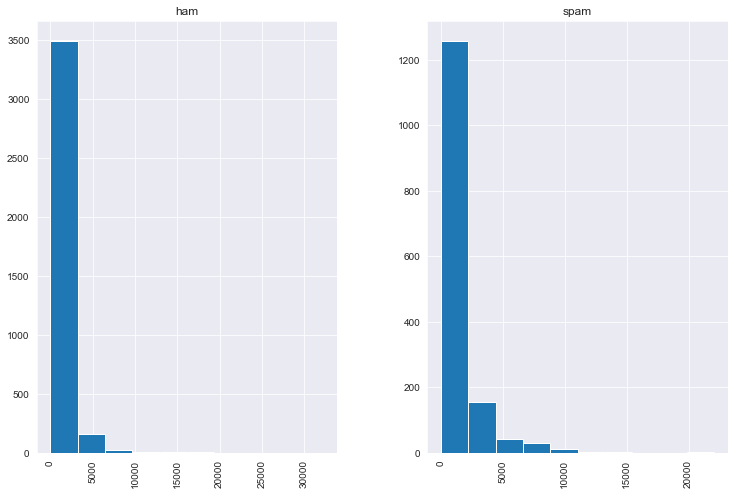

In [10]:
# distribution of spam and ham by length of text
df.hist(column='length',by='label',figsize=(12,8))

In [11]:
print(df.shape)
print(df.dtypes)

(5171, 5)
Unnamed: 0     int64
label         object
text          object
label_num      int64
length         int64
dtype: object


In [12]:
df['text'][5]

'Subject: ehronline web address change\r\nthis message is intended for ehronline users only .\r\ndue to a recent change to ehronline , the url ( aka " web address " ) for accessing ehronline needs to be changed on your computer . the change involves adding the letter " s " to the " http " reference in the url . the url for accessing ehronline should be : https : / / ehronline . enron . com .\r\nthis change should be made by those who have added the url as a favorite on the browser .'

In [13]:
stop = stopwords.words('english')

In [14]:
# preprocessing of text
def clean_text(text):
    # convert in lower case and tokenization
    tokens=word_tokenize(text.lower())
    #filtering only alphabets 
    word_tokens=[t for t in tokens if t.isalpha()]
    #list create for stopwords 
    stop=stopwords.words('english')
    # remove stop words 
    clean_tokens=[t for t in word_tokens if t not in stop]
    # Lenmanization
    lemma=WordNetLemmatizer()
    lemmatized_token=[lemma.lemmatize(t) for t in clean_tokens]
    return ' '.join(lemmatized_token)

In [15]:
# apply the clean_text()
df['text']=df['text'].apply(clean_text)

In [16]:
df['text']

0       subject enron methanol meter follow note gave ...
1       subject hpl nom january see attached file hpln...
2       subject neon retreat ho ho ho around wonderful...
3       subject photoshop window office cheap main tre...
4       subject indian spring deal book teco pvr reven...
                              ...                        
5166    subject put ft transport volume decreased cont...
5167    subject following noms hpl take extra mmcf wee...
5168    subject calpine daily gas nomination julie men...
5169    subject industrial worksheet august activity a...
5170    subject important online banking alert dear va...
Name: text, Length: 5171, dtype: object

* Splits dataset

In [27]:
X=df['text']
Y=df['label_num']

In [28]:
#train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,
                                               random_state=3)

* Tokenization

In [30]:
#tf=TfidfVectorizer()
tf = TfidfVectorizer()

In [31]:
X_train_tf=tf.fit_transform(X_train)
X_test_tf=tf.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [33]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5171,)
(4136,)
(1035,)


#### 1. Logistic regression

In [35]:
lg = LogisticRegression()

In [36]:
lg.fit(X_train_tf,Y_train)

LogisticRegression()

In [37]:
Y_pred = lg.predict(X_test_tf)

In [38]:
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       729
           1       0.94      0.99      0.96       306

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035

[[710  19]
 [  3 303]]


In [39]:
training_pred = lg.predict(X_train_tf)
accuracy_on_training_data = accuracy_score(Y_train, training_pred)
print("accuracy on training data : ", accuracy_on_training_data)

accuracy on training data :  0.995889748549323


In [40]:
testing_pred = lg.predict(X_test_tf)
testing_pred = accuracy_score(Y_test,testing_pred)
print("accuracy on test data : ", testing_pred)

accuracy on test data :  0.978743961352657


#### 2. DecisionTree

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [63]:
dt.fit(X_train_tf, Y_train)

DecisionTreeClassifier()

In [69]:
Y_pred = dt.predict(X_test_tf)

In [70]:
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       729
           1       0.90      0.92      0.91       306

    accuracy                           0.94      1035
   macro avg       0.93      0.94      0.93      1035
weighted avg       0.95      0.94      0.95      1035

[[696  33]
 [ 24 282]]


In [71]:
training_pred = lg.predict(X_train_tf)
accuracy_on_training_data = accuracy_score(Y_train, training_pred)
print("accuracy on training data : ", accuracy_on_training_data)

accuracy on training data :  0.995889748549323


In [72]:
testing_pred = lg.predict(X_test_tf)
testing_pred = accuracy_score(Y_test,testing_pred)
print("accuracy on test data : ", testing_pred)

accuracy on test data :  0.978743961352657


#### 3. Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [74]:
rf_classifier.fit(X_train_tf, Y_train)

RandomForestClassifier(random_state=42)

In [75]:
Y_pred = rf_classifier.predict(X_test_tf)

In [76]:
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       729
           1       0.93      0.98      0.96       306

    accuracy                           0.97      1035
   macro avg       0.96      0.98      0.97      1035
weighted avg       0.97      0.97      0.97      1035

[[708  21]
 [  6 300]]


In [77]:
training_pred = lg.predict(X_train_tf)
accuracy_on_training_data = accuracy_score(Y_train, training_pred)
print("accuracy on training data : ", accuracy_on_training_data)

accuracy on training data :  0.995889748549323


In [78]:
testing_pred = lg.predict(X_test_tf)
testing_pred = accuracy_score(Y_test,testing_pred)
print("accuracy on test data : ", testing_pred)

accuracy on test data :  0.978743961352657
